In [1]:
# import
import os
import time
import random
import datetime

from pathlib import Path

from polarity.toolbox import (init_tissue,
                              define_fold_position,
                              define_apoptotic_pattern)
from polarity.polarity import model, polarity_process

import matplotlib.pyplot as plt

from tyssue.draw import sheet_view

In [2]:
SIM_DIR = Path('/home/guillaume/Simulations/')

today = datetime.date.today().strftime('%Y%m%d')
sim_save_dir = SIM_DIR / f'{today}-variability'

try:
    os.mkdir(sim_save_dir)
except FileExistsError:
    pass

In [3]:
# Create initial tissue
sheet = init_tissue()

define_fold_position(sheet, fold_number=1, position=[-8, 8])


In [4]:
from tyssue.behaviors.sheet.basic_events import reconnect


(<Figure size 640x480 with 1 Axes>, <Axes: >)

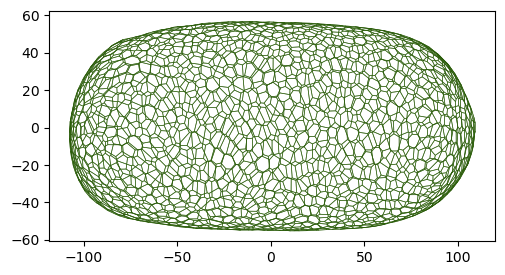

In [6]:
sheet_view(sheet, coords="zx")

# Sequential execution

In [7]:
from datetime import datetime

global_start = datetime.now()
print('start: ' + str(global_start))


sheet.settings['rosette_kwargs'] = {
    "threshold_length": 0.01,
    "p_4": 1e-2,
    "p_5": 1e-3
}

sheet.specs["vert"]["radial_tension"] = 0.0

potential_perturbator_cells = sheet.face_df[
                                    (sheet.face_df.z > -45) &
                                    (sheet.face_df.z < 45)].index.to_numpy()

position_perturbation = []
define_apoptotic_pattern(sheet)

# Number of perturbation that we want
for i in range(3):
    cell_perturb = potential_perturbator_cells[
                                random.randint(0, len(potential_perturbator_cells))
                                                    ]
    position_perturbation.append(cell_perturb)

# polarity = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
polarity = [0.5]
perturbation = [-1, position_perturbation]

for pola in polarity:
    for perturb in perturbation : 
        sheet_ = polarity_process(sim_save_dir, 
                         sheet,
                         pola,
                         perturb
                        )
        
global_end = datetime.now()
print('end : '+ str(global_end))
print('Durée totale d execution : \n' + str(global_end-global_start))

start: 2024-03-08 09:48:47.759652


TypeError: exceptions must derive from BaseException

(<Figure size 640x480 with 1 Axes>, <Axes: >)

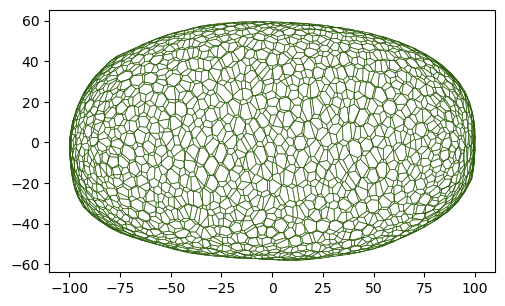

In [9]:
sheet_view(sheet, coords="zx")

In [10]:
pola

0.5